# Sephora Sentiment Prediction Classifer

## Introduction
#### The Sentiment Prediction includes 2 main objectives
1. sentiment prediction
- to explore and train a classfier to predict the sentiment of reviews using NB
- to understand key features contributing to the sentiments 
- to compare NB classfier V.S. BERT

2. sentiment analysis 
- use VADER to understand polarity and subjectivity
- potentially to mine sentiment keywords using EDA

#### the content of this notebook includes the followings
- Baseline model
- Advanced EDA to understand potential hyper tuning
- Naive Bay model Fine Tuning 
- BERT
- explore VADER


## About classfier pipeline


the defination are stored seperately in sentiment_nb.py file, and import into the jupyter notebook for cleaer flow, some functions are listed below:

class classifer
- preprocesser: lowercase, stopword, lemmatizer, remove_plural, customized_stopword
- vectorizer: count, tfidf, word2vec
- naive bayes classfier: preprocessors -> vectorizer -> train -> evaluate

class Visualization
- draw confusion_matrix for different labels
- draw samples of wrongly classfied text to understand why its wrongly labeled
- show top features which contributes to the prediction 

class Validator
- take in munual text input
- predict the label for munual validation

## Data Import 

In [1]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

from naive_bayes_utils import NaiveBayesClassifier

In [2]:
# set display options for max column width
pd.set_option('display.max_colwidth', 30)

latest_review = pd.read_csv('data/latest_review.csv')
latest_review 

/var/folders/8z/fr1y76rn6js5w526_mc9y1hh0000gn/T/ipykernel_10437/2735324189.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  latest_review = pd.read_csv('data/latest_review.csv')


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,hair_color,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category,true_sentiment,length
0,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I...,"Decent, but cheaper produc...",...,red,P420652,Lip Sleeping Mask Intense ...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,neutral,172
1,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting o...,Where’s the smell??,...,NaN,P420652,Lip Sleeping Mask Intense ...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,negative,160
2,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing...,Must buy!,...,blonde,P420652,Lip Sleeping Mask Intense ...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,92
3,7052423388,4,1.0,0.333333,3,2,1,2022-12-31,I really enjoy this produc...,Lovely smell,...,blonde,P420652,Lip Sleeping Mask Intense ...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,148
4,23120633832,5,1.0,0.500000,2,1,1,2022-12-31,The best. I have nothing e...,Amazing,...,NaN,P420652,Lip Sleeping Mask Intense ...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192222,9109189891,5,1.0,NaN,0,0,0,2022-04-29,I LOVE this stuff! It work...,Great product!,...,NaN,P500101,Hydro Ungrip Makeup Remove...,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,153
192223,8115925555,5,1.0,NaN,0,0,0,2022-04-29,love this micellar water f...,NaN,...,red,P500101,Hydro Ungrip Makeup Remove...,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,133
192224,10723607564,5,1.0,NaN,0,0,0,2022-04-29,I loveeeeee Milk!!! Just d...,NaN,...,black,P500101,Hydro Ungrip Makeup Remove...,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,125
192225,5953458355,5,1.0,NaN,0,0,0,2022-04-29,My new favorite makeup rem...,Works extremely well,...,blonde,P500101,Hydro Ungrip Makeup Remove...,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,255


In [3]:
# understand what are the columns in the dataset
latest_review.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd',
       'primary_category', 'secondary_category', 'tertiary_category',
       'true_sentiment', 'length'],
      dtype='object')

In [4]:
# only keep relevent cols to reduce processing time
columns_to_keep = ['rating', 'is_recommended', 'helpfulness','submission_time', 
                   'review_text','review_title', 'length',
                   'product_name', 'brand_name', 'price_usd',
                   'primary_category', 'secondary_category', 'tertiary_category',
                   'true_sentiment', ]
latest_review = latest_review[columns_to_keep]

## Model Training Baseline

After simple EDA (refer to main file), a classfier pipeline using Naive Bay model is constructed. The baseline model is using clean text without further engineered features. 

The parameters used for the baseline model as below:
- target variables: true sentiments (<=2: negative, =3: neutral, >=4: positive)
- input data: all reviews
- features: only 'review_text'
- preprocessor: lowercase
- vectorizer: count


In [5]:
# train baseline model with latest_review for the baseline model
preprocessors = ['lowercase']
nb_classifier = NaiveBayesClassifier(data=latest_review, text_col='review_text', preprocessors=preprocessors)
train_metrics, test_metrics = nb_classifier.train(vectorizer_type='count', use_additional_features=False)

/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/naive_bayes_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['reviews_processed'] = self.data[self.text_col].apply(self.apply_preprocessors)


In [6]:
# get the basic evaluation/accuracy metrics
print(f"Train Accuracy: {train_metrics['accuracy']:.5f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.5f}")

Train Accuracy: 0.87263
Test Accuracy: 0.86337


In [7]:
# set column labels
labels = sorted(nb_classifier.data['true_sentiment'].unique())
index_labels = [f"True {label}" for label in labels]
column_labels = [f"Predicted {label}" for label in labels]

# get train evaluation for train set
print("\nTrain:")
nb_classifier.display_results(train_metrics)

confusion_df = pd.DataFrame(train_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Train:
accuracy: 0.87263
precision: 0.88487
recall: 0.87263
f1: 0.87797
f2: 0.87505

Confusion Matrix:


,Predicted negative,Predicted neutral,Predicted positive
True negative,7653,1299,1535
True neutral,1562,4470,2766
True positive,2655,4873,88523


In [8]:
# get train evaluation for test set
print("\nTest:")
nb_classifier.display_results(test_metrics)

confusion_df = pd.DataFrame(test_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Test:
accuracy: 0.86337
precision: 0.87448
recall: 0.86337
f1: 0.86839
f2: 0.86556

Confusion Matrix:


,Predicted negative,Predicted neutral,Predicted positive
True negative,4646,1017,1148
True neutral,1263,2468,2059
True positive,1741,3278,59271


In [9]:
results_list = []

new_entry = {
    'Name': 'Baseline Model',
    'Train Accuracy': train_metrics['accuracy'],
    'Train Precision': train_metrics['precision'],
    'Train Recall': train_metrics['recall'],
    'Train F1': train_metrics['f1'],
    'Train F2': train_metrics['f2'],
    'Train Confusion Matrix': train_metrics['confusion_mat'].tolist(), 
    'Test Accuracy': test_metrics['accuracy'],
    'Test Precision': test_metrics['precision'],
    'Test Recall': test_metrics['recall'],
    'Test F1': test_metrics['f1'],
    'Test F2': test_metrics['f2'],
    'Test Confusion Matrix': test_metrics['confusion_mat'].tolist(), 
    'Preprocesser': preprocessors, 
    'Vectorizer': 'count',
    'Classifier': 'Naive Bayes',
    'Feature': 'review_text',
    'Target': 'positive, negative, neutral',
    'remarks': 'baseline model'
}

results_list.append(new_entry)
results_list


[{'Name': 'Baseline Model',
  'Train Accuracy': 0.8726330027051398,
  'Train Precision': 0.8848691353143678,
  'Train Recall': 0.8726330027051398,
  'Train F1': 0.8779655023510915,
  'Train F2': 0.8750530815889245,
  'Train Confusion Matrix': [[7653, 1299, 1535],
   [1562, 4470, 2766],
   [2655, 4873, 88523]],
  'Test Accuracy': 0.8633650232146806,
  'Test Precision': 0.8744765243432968,
  'Test Recall': 0.8633650232146806,
  'Test F1': 0.8683897893617993,
  'Test F2': 0.8655646758307657,
  'Test Confusion Matrix': [[4646, 1017, 1148],
   [1263, 2468, 2059],
   [1741, 3278, 59271]],
  'Preprocesser': ['lowercase'],
  'Vectorizer': 'count',
  'Classifier': 'Naive Bayes',
  'Feature': 'review_text',
  'Target': 'positive, negative, neutral',
  'remarks': 'baseline model'}]

In [10]:
# sample incorrect prediction 
from naive_bayes_utils import NaiveBayesVisualization
visualizer = NaiveBayesVisualization(nb_classifier)
text = visualizer.display_incorrect_samples()
text

Review: Love this lip mask nothing else will do Aquaphor and Vaseline just aren’t as moisturizing as this mask is I recommend it to everyone I know￼
Review Procrssed: love this lip mask nothing else will do aquaphor and vaseline just aren’t as moisturizing as this mask is i recommend it to everyone i know￼
Actual Sentiment: positive
Predicted Sentiment: negative

Review: I had chapped lips suddenly (normally not a problem for me) and after several days of lip balm/chapstick, they only started healing once I started using this. I had a sample from a reward or birthday gift. I will definitely keep it on hand for the future.
Review Procrssed: i had chapped lips suddenly (normally not a problem for me) and after several days of lip balm/chapstick, they only started healing once i started using this. i had a sample from a reward or birthday gift. i will definitely keep it on hand for the future.
Actual Sentiment: positive
Predicted Sentiment: negative

Review: I put off getting this for too

/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/naive_bayes_utils.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['prediction'] = self.validator.predict_batch(self.data['reviews_processed'].tolist())


it is observed from both confusion matrix and sample data:
- the classfier does not prefrom well with neutral labeled data. With human observation, many of 'netural' data are not netural but contains sentiments, such data might create a nosie to the whole dataset. 
- misclassification among positive and negtive to be imporved  

## Advanced EDA

In [11]:
latest_review.columns

Index(['rating', 'is_recommended', 'helpfulness', 'submission_time',
       'review_text', 'review_title', 'length', 'product_name', 'brand_name',
       'price_usd', 'primary_category', 'secondary_category',
       'tertiary_category', 'true_sentiment', 'reviews_processed',
       'prediction'],
      dtype='object')

### deal with duplicated reviews

In [12]:
# Adjust pandas display options
pd.set_option('display.max_colwidth', None)

In [13]:
# check % of duplicated rows
total_rows = len(latest_review)
unique_reviews = latest_review['review_text'].nunique()
duplicates = total_rows - unique_reviews
percentage_duplicates = (duplicates / total_rows) * 100

print(f"Total number of rows: {total_rows}")
print(f"Number of unique reviews: {unique_reviews}")
print(f"Number of duplicate reviews: {duplicates}")
print(f"Percentage of duplicate reviews: {percentage_duplicates:.2f}%")


Total number of rows: 192227
Number of unique reviews: 172007
Number of duplicate reviews: 20220
Percentage of duplicate reviews: 10.52%


In [14]:
# sample top 10 helpfulness duplicated reviews
duplicate_reviews = latest_review[latest_review.duplicated(subset='review_text', keep=False)].sort_values('review_text')
selected_columns = ['rating', 'submission_time', 'review_text', 'review_title', 'product_name', 'brand_name', 'price_usd']
duplicate_reviews.sort_values(by=['helpfulness', 'review_text'], ascending=False)[selected_columns].head(10)


,rating,submission_time,review_text,review_title,product_name,brand_name,price_usd
4665,5,2022-12-27,♡AMAZING!♡I love this product so muchh because it really helps my skin that is full of pimples.This is week 2 of using this product.,LOVE IT! I WILL TOTALLY BUY AGAIN,Mini Superfood Antioxidant Cleanser,Youth To The People,14.00
3814,5,2022-12-27,♡AMAZING!♡I love this product so muchh because it really helps my skin that is full of pimples.This is week 2 of using this product.,LOVE IT! I WILL TOTALLY BUY AGAIN,Superfood Antioxidant Cleanser,Youth To The People,39.00
19860,5,2022-07-19,•consistency reminds me kind of like a makeup primer? (which I like)•rubs in completely clear & doesn’t leave any shine•there’s a scent but not overpowering •i’d recommend a moisturizer before this sunscreen,I dig it,Unseen Sunscreen SPF 40 PA+++,Supergoop!,48.00
20395,5,2022-07-19,•consistency reminds me kind of like a makeup primer? (which I like)•rubs in completely clear & doesn’t leave any shine•there’s a scent but not overpowering •i’d recommend a moisturizer before this sunscreen,I dig it,Mini Unseen Sunscreen SPF 40 PA+++,Supergoop!,22.00
159647,5,2022-07-30,İ love it and makes my dull skin refreshed and bright.,NaN,Fulvic Acid Brightening Cleanser,The INKEY List,11.99
159747,5,2022-07-30,İ love it and makes my dull skin refreshed and bright.,NaN,Mini Fulvic Acid Brightening Cleanser,The INKEY List,5.99
25869,3,2022-01-01,you NEED to wash it off with a different cleanser!!! this is more of a make up remover greasy balm.,"If you buy this, double cleanse",Oat Cleansing Balm,The INKEY List,11.99
26722,3,2022-01-01,you NEED to wash it off with a different cleanser!!! this is more of a make up remover greasy balm.,"If you buy this, double cleanse",Mini Oat Cleansing Balm,The INKEY List,5.99
25831,1,2022-01-08,"worst product ever, im SO disappointed i strayed from my OG Clinique take the day off. For one, this doesn’t work AT ALL - it doesn’t take makeup off at all. The worst though, is that the product completely seperated. I went to use it, and a bit of cleanser came out and then the rest was just gross liquid. throwing this out ASAP, so upset.",DO NOT BUY,Oat Cleansing Balm,The INKEY List,11.99
26684,1,2022-01-08,"worst product ever, im SO disappointed i strayed from my OG Clinique take the day off. For one, this doesn’t work AT ALL - it doesn’t take makeup off at all. The worst though, is that the product completely seperated. I went to use it, and a bit of cleanser came out and then the rest was just gross liquid. throwing this out ASAP, so upset.",DO NOT BUY,Mini Oat Cleansing Balm,The INKEY List,5.99


after checking the duplicated reviews, the duplicated reviews are made by the same customer, on the same day, for the same product but in different size. It can be considered as noise in the trainning data as it populates 10% of data, such data should be removed to keep only one row with the normal size. 

In [15]:
# drop duplicates and store into new df
df = latest_review.drop_duplicates(subset='review_text', keep='first')

### understanding target variables/lebal: rating & is_recommended

can is_recommended be used as target variables? 

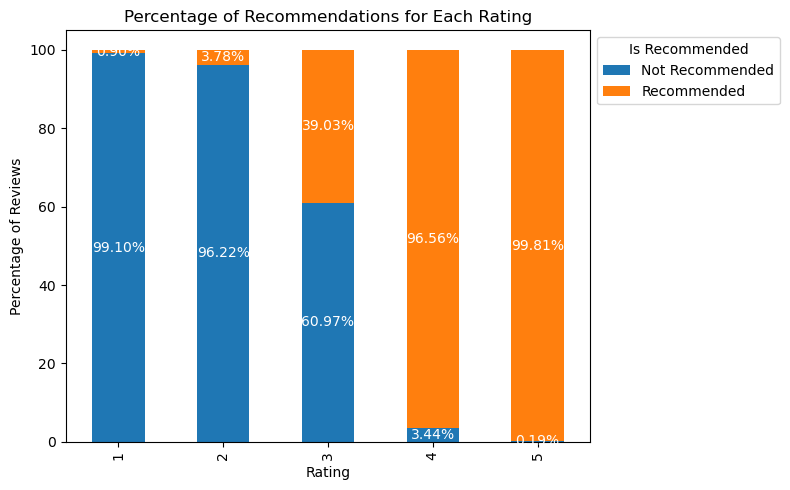

In [16]:
# understand % of is_recommended for different ratings

pivot_data = df.groupby(['rating', 'is_recommended']).size().unstack().fillna(0)
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plotting
ax = pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_title('Percentage of Recommendations for Each Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Percentage of Reviews')
ax.legend(title="Is Recommended", labels=["Not Recommended", "Recommended"], loc="upper left", bbox_to_anchor=(1, 1))

# Annotate with the percentage values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x+width/2, y+height/2, f"{height:.2f}%", ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


logically, user give higher ratings would more likely to recommend certain products 
- why some users recommend a product even if they give it a rating of 1? 
- why some don't recommend a product even if they give it a rating of 5?
- is is_recommended a valuable column to use? 

To achieve objectives above:
- Sample top 10 helpful(helpfulness) review where a user gave a rating of 1 but recommended the product.
- Sample top 10 helpful(helpfulness) review where a user gave a rating of 5 but didn't recommend the product.
- Generate word cloud for each type

In [17]:
# sample reviews with rating 1 but recommended
recommended_with_1 = df[(df['rating'] == 1) & (df['is_recommended'] == 1)]

# Display the top 10 reviews based on helpfulness
top_10_reviews = recommended_with_1.nlargest(10, 'helpfulness')
display(top_10_reviews[['review_text', 'review_title', 'product_name', 'brand_name', 'price_usd']])

,review_text,review_title,product_name,brand_name,price_usd
38428,"Love the original, hate the refill. Purchased the refill to save some money and plastic. I followed the instructions to replace the refill and The pump no longer works and I can’t unscrew the refill to get the product out by hand. I’ve essentially wasted the $42 and my local Sephora doesn’t carry this product so I can’t exchange it. I’m just going to see if I can break the container open to salvage some of my purchase. Don’t buy the refill.",NaN,Barrier+ Triple Lipid-Peptide Face Cream,Skinfix,54.00
42566,"It feels very cooling when first applied, but that’s it. It doesnt work, it doesn’t depuff, it doesn’t anything. I’ve been using it for months and I haven’t seen any change at all. It does absorb easily and the gel like texture makes it easy to apply in specific areas, but it doesn’t do anything.",Doesn't work,Caffeine 5% + EGCG Depuffing Eye Serum,The Ordinary,8.90
54137,I didn’t use this product because it did not have a safety seal when you opened it. It was just there. I prefer not to put product around my eyes.,I didn't use it,Advanced Night Repair Eye Gel-Cream,Estée Lauder,72.00
58368,"I do not like the knew packaging. A lot more formula comes out, I feel like I use more product now then before before and the bottle keeps opening all together I constantly have to be Putting it back together",I miss the old formula,C-Firma Fresh Vitamin-C Day Serum,Drunk Elephant,78.00
62118,The product is perfect but imagine purchasing the item and have a complete reaction due to the product being expired!! Thank you Sephora for not pulling your expired items off the shelf. Expectation date May 2022 and it’s almost 2023. I returned the product for an exchange but all of them were expired!Speechless!!,Check The Expiration Date,CC+ Cream Oil-Free Matte with SPF 40,IT Cosmetics,44.00
87609,"The old formula was 10 stars. I’ve been loyal to it for probably 7 years, and I’m a product junkie. Nothing beat the old formula.It’s probably not 1 star now, but compared to the old formula which was 10 stars, the new formula is 1 by comparison. The old formula gave a squeaky clean feeling, got rid of blackheads and other skin issues.New formula isn’t just thicker, it doesn’t give the squeaky clean feeling that the old formula had, it doesn’t clear blackheads or dry skin acne.I have dry skin, with acne and the old formula fixed that. The new formula just isn’t the same at all.","New formula isn’t the same, completely different",Purifying Gentle Foaming Cleanser with Salicylic Acid,Clarins,30.00
88070,"Love this cream, BUT this is my second time getting one and the pump doesn’t work!!! So frustrating. Expensive cream that works magic, but the pump will not start. I tossed receipt out because I know I love the cream but what a waste.",NaN,Triple Active Retinol Gentle Overnight Renewal Cream,Dr. Brandt Skincare,75.00
102364,"Unfortunately this was extremely harsh on my sensitive skin. It completely broke my skin out-on & around all areas applied. I was given this to sample by BuzzAgent & I’m thankful for the opportunity to try this product. I can understand more what my skin can & cannot tolerate. Just because it didn’t work for me, doesn’t mean it won’t work for you. Kiehl’s has amazing products. You just have to find the right serum & face products for your skin type.",NaN,Clearly Corrective Dark Spot Correcting Serum,Kiehl's Since 1851,65.00
121316,Odd reaction to this after the first use. Don’t usually have sensitivity to any products.,Unusual reaction,Sugar Recovery Lip Mask Advanced Therapy,fresh,28.00
129421,Really didn’t like this product. The smell isn’t my favorite and the texture is gritty felt like an exfoliant and didn’t do much for my skin,NaN,Vitamin C Brightening Cream,The INKEY List,10.99


In [18]:
# sample reviews with rating 5 but not recommended
not_recommended_with_5 = df[(df['rating'] == 5) & (df['is_recommended'] == 0)]

# Display the top 10 reviews based on helpfulness
top_10_reviews_not_recommended = not_recommended_with_5.nlargest(10, 'helpfulness')
display(top_10_reviews_not_recommended[['review_text', 'review_title', 'product_name', 'brand_name', 'price_usd']])


,review_text,review_title,product_name,brand_name,price_usd
1535,"Love this cleanser, use it every day. Very gentle on dry skin. Doesn’t take off my makeup super well so I use it as the second part of a double cleanse if I wear makeup.",NaN,Soy Hydrating Gentle Face Cleanser,fresh,39.0
1556,Soft and nice. Smells almost neutral. Does not dry out my skin.,NaN,Soy Hydrating Gentle Face Cleanser,fresh,39.0
4109,"I have very sensitive, combination skin. This cleanser is the only one I’ve been able to find that has cleared my skin after one use, and keeps my skin under control all around. It’s gentle, but really deeply cleanses without over stripping it. I keep coming back to it time and time again.",GO TO,Superfood Antioxidant Cleanser,Youth To The People,39.0
7637,Loved it deff worth the money for the full size. I don’t use it often but when my skin just need a gentle scrub this is my go to. It feels so smooth & clean after.,Loved it,Mini Daily Microfoliant Exfoliator,Dermalogica,18.0
14584,Best moisturizer for my combination skin. I’ve been using for a little over a year now and my skin has changed drastically,NaN,The Water Cream Oil-Free Pore Minimizing Moisturizer,Tatcha,70.0
14990,It works amazing for sensitive yet acne prone skin,A must have !,Hyaluronic Acid 2% + B5 Hydrating Serum,The Ordinary,15.7
15149,Excelent product! Excelent price and size!Recommended 100%,NaN,Hyaluronic Acid 2% + B5 Hydrating Serum,The Ordinary,15.7
17955,I’m not sure that in my 32 years If living that I have ever seen results from anything that have been this fast AND amazing. My pores were smaller evened after1 use and they continued to get smaller. I also have rosacea which has improved almost to the point where it is gone. I use it 2xs a day and it’s really my holy grail. So glad that I bought the mini on a whim at the checkout!,RESULTS,"Beauty Elixir Prep, Set, Glow Face Mist",Caudalie,49.0
19801,"I wear this everyday and it never breaks me out. I have very sensitive, acne-prone skin and I never have any issues. I use it as a makeup primer too. This product is a daily must have!!",Must have!,Unseen Sunscreen SPF 40 PA+++,Supergoop!,48.0
38387,"Barrier Booster Orange Ferment Essence is lovely!! Love how it glides on and how well it absorbs into my skin! This has really helped with my uneven skintone and has kept my face super hydrated! Living in a city where our pollen count is extremely high, I love knowing I’m wearing this and it’s protecting my skin! My face looks great and I feel a few years younger! Gifted by Barrier, thank you so much for giving me the opportunity to try!!",Love it!!!,Barrier+ Triple Lipid-Peptide Face Cream,Skinfix,54.0


create word cloud to understand high frequency terms

In [19]:
# Define a function to draw the word clouds
def get_word_cloud_text(df):
    return " ".join(review for review in df['review_text'])

def draw_word_cloud(text, ax, title):
    wordcloud = WordCloud(background_color="white", max_words=100).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(title)

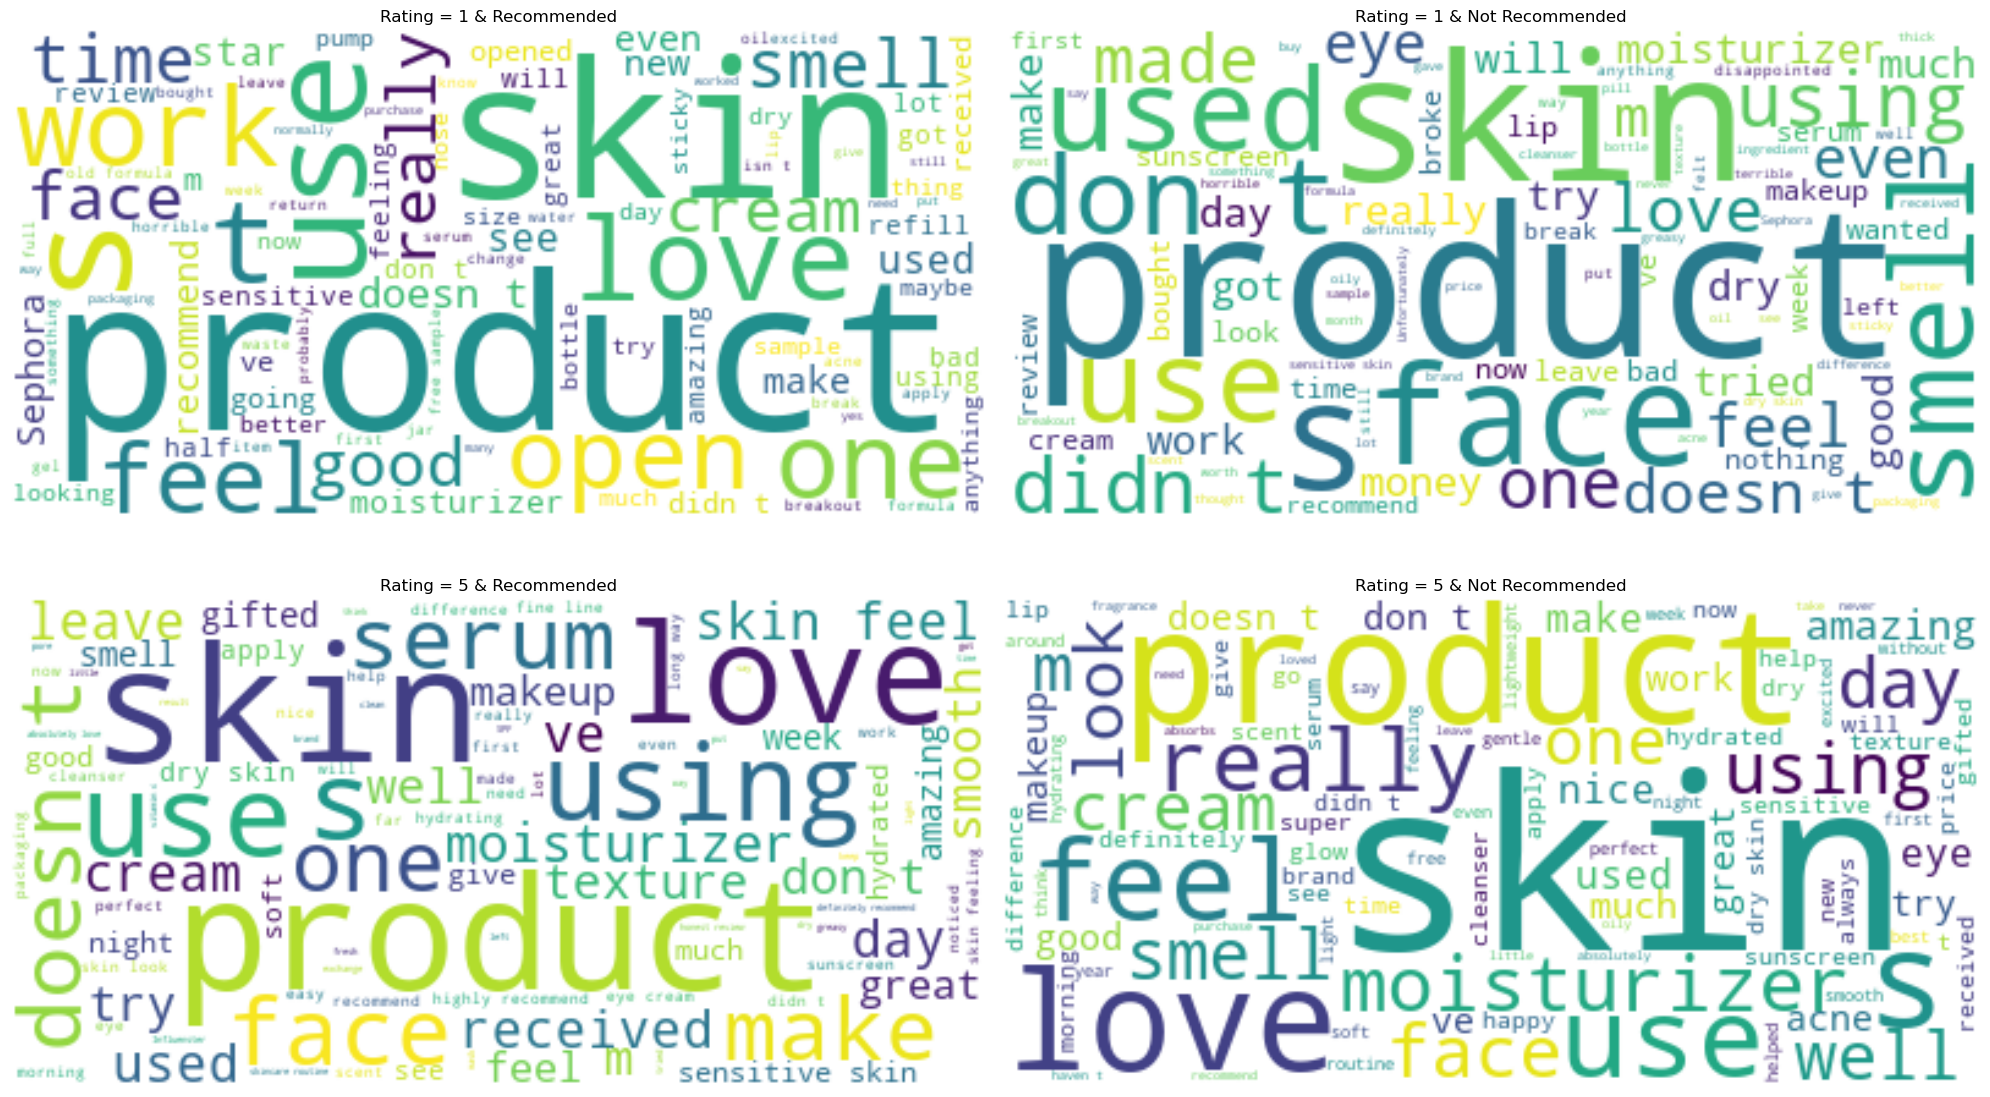

In [20]:
# get dataframe
recommended_with_5 = df[(df['rating'] == 5) & (df['is_recommended'] == 1)]
not_recommended_with_1 = df[(df['rating'] == 1) & (df['is_recommended'] == 0)]

# draw word cloud
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

draw_word_cloud(get_word_cloud_text(recommended_with_1), axs[0, 0], "Rating = 1 & Recommended")
draw_word_cloud(get_word_cloud_text(not_recommended_with_1), axs[0, 1], "Rating = 1 & Not Recommended")
draw_word_cloud(get_word_cloud_text(recommended_with_5), axs[1, 0], "Rating = 5 & Recommended")
draw_word_cloud(get_word_cloud_text(not_recommended_with_5), axs[1, 1], "Rating = 5 & Not Recommended")

plt.tight_layout()
plt.show()

is_recommended is not a good feature to used as target variables, the text sample  since the text sample is primarily based on ratings. 

Additionally, many irrelevant words, such as 'product,' 'skin,' and 'cream,' describe the product category and might introduce noise into the dataset

### understanding target variables/lebal: rating = 3

zoom onto reviews with ratings 3
- it observed that half of 3 review recommend, and the half does not
- current classfier failed to predict netural labels well
- understand the true sentiment
- is such data noise to the dataset?

To achieve above:
- some sample data
- wordcloud

In [21]:
# Filtering out reviews with ratings of 3
reviews_with_3 = df[df['rating'] == 3]

# Fetching top 10 samples for both categories
recommended_samples = reviews_with_3[reviews_with_3['is_recommended'] == 1].sample(10)
not_recommended_samples = reviews_with_3[reviews_with_3['is_recommended'] == 0].sample(10)


In [22]:
# Display the samples
pd.set_option('display.max_colwidth', None)

print("Top 10 Sample Reviews with Rating of 3 that are Recommended:")
display(recommended_samples[['review_text', 'is_recommended', 'true_sentiment']])

print("\nTop 10 Sample Reviews with Rating of 3 that are Not Recommended:")
display(not_recommended_samples[['review_text', 'is_recommended', 'true_sentiment']])

Top 10 Sample Reviews with Rating of 3 that are Recommended:


,review_text,is_recommended,true_sentiment
184672,"I like that this is lightweight and absorbs quickly into the skin. Leaves my neck hydrated and moisturized. I’m not sure if it has helped to firm, will need more time with the product. And the same is true for brightening. The scent is nice, however, I do prefer my skincare to be unscented as I’m sensitive prone. And to that point, I may be experiencing some slight irritation to this. I do need some additional time with the product, and eliminating some other things to know for certain. My fave thing is the packaging.",1.0,neutral
83535,"I received this product complimentary from Influenster for my review. However, my reviews are always unbiased. I really wanted to live this product! Being someone with skin that tends to lean dry I was so excited by how hydrating this moisturizer is. Unfortunately, my skin is extremely sensitive to changes in my routine and this cause my acne to flair up. For someone with less acne sensitive skin this product would be amazing!",1.0,neutral
145462,"This cream only requires a half pump for both eyes... dont waste too much product! I love how immediately hydrated my eye area is after applying. I’ve used this both in the evening and during the day. Like others, I did experience slight irritation (watery, sometimes burning eyes). So, for the reason, I prefer it for bedtime application. I LOVE this cream when it doesn’t irritate my eyes and could definitely do without when it doesn’t. SO, I’m giving it a middle of the road rating since I don’t reach for it if I don’t want to chance irritation.",1.0,neutral
49196,"I received this product from Topbox Circle in exchange for my honest review. This Clinique Smart Clinical Repair has a wonderful feel. It is not a heavy product. It goes on light and smooth and does not feel clumpy on my skin. It is fragrance free and is quite sheer. Once applied it does not have an oily feel to it and it stays on my skin. I used this in the evening mainly after i washed my face. I also used this under makeup in the daytime and it works well as a primer. As far as correcting wrinkles- honestly, I have not used it enough to formulate an honest opinion of the product.",1.0,neutral
163051,"I received this from Influenster in exchange for my honest opinion. I don’t do sheet masks very often, but this one was pretty easy to apply! Like most clay masks it does a good job of soaking up oil on the skin, and it felt nice when it was on. However it’s very cold and dry where I am so I think it was a little too drying for me right now. I might like it better in the summer when my skin is more oily!",1.0,neutral
148846,"I like to smell in the consistency of this cleanser, however I think the grain for the micro dermabrasion is a little too big. I will wash it off thoroughly, and still have grit on my face. It’s not ideal for me, and the cap also gets clogged so easily.",1.0,neutral
48415,Got this as a sample - I liked the product - thought the consistency was nice and I would probably try it again.,1.0,neutral
178240,"So far so okay. I’m not seeing the instant results that other reviewers mention, but I assume this product may need more time. I’ve been using it for 2 weeks daily and have yet to see any difference, but maybe my neck lines are deeper than others…we shall see. The serum is nice and light weight though and leave my skin feeling very hydrated.",1.0,neutral
27360,"I find this product if I use it everyday, my skin gets very dry. I think it is ok for my skin, but I won’t buy it again.",1.0,neutral
95038,The scent is really strong. Personally not the biggest fan or the smell. Packaging is beautiful though. I appreciate the reusable jar packaging!! The texture is nice and it feels really moisturizing on the skin,1.0,neutral



Top 10 Sample Reviews with Rating of 3 that are Not Recommended:


,review_text,is_recommended,true_sentiment
191528,this didn’t really do much for me. i saw improvement for the first week that I was using it and then my redness got worse. it is also not great under makeup as it dries the skin.,0.0,neutral
120495,"I received this product complimentary from Influenster to provide an honest review. I have been using this for almost a month now and am not certain if I have noticed any change. This serum seems to be a mixture between a cream and a serum. It looks very milky and feels cooling on the skin. It doesn’t dry down sticky or peel off your face like some serums do. My skins moisturizer level feels about the same before and after application. The scent is on the plastic side. The packaging looks like a high end glass bottle, but is actually plastic. Overall I wasn’t terribly impressed with this product. I plan on finishing the bottle, but will not purchase it in the future.",0.0,neutral
143736,I used this once and it broke my skin out pretty bad. Don’t recommend.,0.0,neutral
125528,"Not the best self-tanner I have used. It was more streaky than I would hoped but was easy to apply! Although it doesn’t say you need a mit, next time I use it I will probably get one. It gave me a nice golden bronze color!",0.0,neutral
48164,"There is a lot of hype around this product but it’s just MEH for me. It’s a bit sticky so I hated wearing it in the summer and find that it’s more tolerable in the cooler months. It makes my skin feel nice, but I do not notice any sort of “plumping“ effect.",0.0,neutral
174941,I like it for night time or no make-up days. It makes my makeup ball up. It also heavily scented.,0.0,neutral
6507,Love the concept of color correcting redness while also providing sun protection but this product is not suitable for anyone with medium to tan/deep skin tones and will make you look gray/ashy.,0.0,neutral
89894,"Gets the job done, but does not go above and beyond. This has a high price point for such a mediocre product.",0.0,neutral
84687,"I received this complimentary from influenster & Tula. I don’t love it, but I don’t hate it. It smells good and it feels nice on my skin and I have noticed reduced pores. However, I have super sensitive skin and this product does not agree with it. I’ve noticed more redness, pimple breakouts and more oily areas on my t-zone than with other products.",0.0,neutral
101253,Wanted to love it but I saw no improvements to the under eye area after finishing the entire bottle. It also caused millia. It is hydrating though.,0.0,neutral


In [23]:
stopwords = set([
        'mist', 'sunscreen', 'toner', 'moisturizer', 'skincare','blush', 'cream', 'product',
        'remover', 'essence', 'foundation', 'serum', 'mask', 'cleanser', 'lipstick','makeup',
        'skin','I','my','and','so','this','it','s','that','face','the','or','in','on','for','with',
        'also','a','is','me','as','you','which','to','of'
    ])

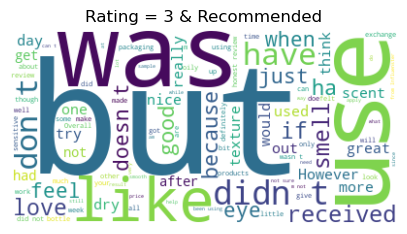

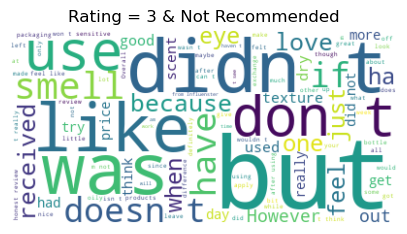

In [24]:
def generate_word_cloud(df, title):
    text = " ".join(review for review in df['review_text'])
    wordcloud = WordCloud(background_color="white", max_words=100,stopwords=stopwords).generate(text)
    
    plt.figure(figsize=(5, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds
generate_word_cloud(reviews_with_3[reviews_with_3['is_recommended'] == 1], "Rating = 3 & Recommended")
generate_word_cloud(reviews_with_3[reviews_with_3['is_recommended'] == 0], "Rating = 3 & Not Recommended")


review with rating of 3, seems to have both negtive and positive feedbacks. Thus such reviews could be recognozied as noise to be excluded

In [25]:
# create a new dataframe df_no_3 to store only positive and negative feedbacks
df_no_3 = df[df['rating'] != 3]
pd.set_option('display.max_colwidth', 50)
df_no_3


,rating,is_recommended,helpfulness,submission_time,review_text,review_title,length,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category,true_sentiment,reviews_processed,prediction
1,2,0.0,0.500000,2022-12-31,Might as well be putting on Vaseline because I...,Where’s the smell??,160,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,negative,might as well be putting on vaseline because i...,negative
2,5,1.0,1.000000,2022-12-31,Love this lip mask nothing else will do Aquaph...,Must buy!,92,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,love this lip mask nothing else will do aquaph...,negative
3,4,1.0,0.333333,2022-12-31,I really enjoy this product! Amazing smell and...,Lovely smell,148,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,i really enjoy this product! amazing smell and...,positive
4,5,1.0,0.500000,2022-12-31,The best. I have nothing else to really say ot...,Amazing,36,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,the best. i have nothing else to really say ot...,positive
5,5,1.0,NaN,2022-12-31,I had chapped lips suddenly (normally not a pr...,Lip Saver!,153,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,positive,i had chapped lips suddenly (normally not a pr...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192222,5,1.0,NaN,2022-04-29,I LOVE this stuff! It works amazingly well at ...,Great product!,153,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,i love this stuff! it works amazingly well at ...,positive
192223,5,1.0,NaN,2022-04-29,love this micellar water from Milk! it removes...,NaN,133,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,love this micellar water from milk! it removes...,positive
192224,5,1.0,NaN,2022-04-29,I loveeeeee Milk!!! Just discovered this brand...,NaN,125,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,i loveeeeee milk!!! just discovered this brand...,positive
192225,5,1.0,NaN,2022-04-29,"My new favorite makeup remover. First of all, ...",Works extremely well,255,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,Skincare,Cleansers,Makeup Removers,positive,"my new favorite makeup remover. first of all, ...",positive


### understanding target variables/lebal: unbalanced data

In [26]:
df_no_3.columns

Index(['rating', 'is_recommended', 'helpfulness', 'submission_time',
       'review_text', 'review_title', 'length', 'product_name', 'brand_name',
       'price_usd', 'primary_category', 'secondary_category',
       'tertiary_category', 'true_sentiment', 'reviews_processed',
       'prediction'],
      dtype='object')

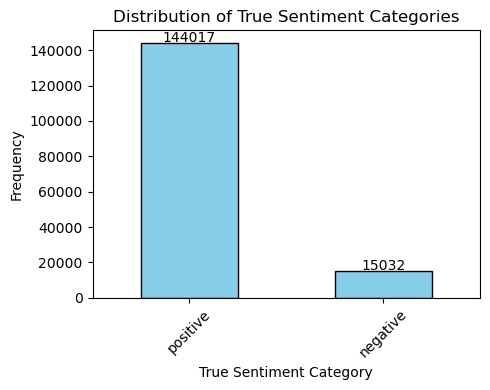

In [27]:
# check distribution of sentiments
value_counts = df_no_3['true_sentiment'].value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Distribution of True Sentiment Categories')
ax.set_xlabel('True Sentiment Category')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45) 

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.tight_layout()  

# Display the plot
plt.show()


In [28]:
# undersampling 

# Separate majority and minority classes
df_majority = df_no_3[df_no_3['true_sentiment'] == 'positive']
df_minority = df_no_3[df_no_3['true_sentiment'] == 'negative']

# Undersample the majority class
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)
df_undersampled = pd.concat([df_majority_undersampled, df_minority], axis=0)
df_undersampled = df_undersampled.sample(frac=1, random_state=2023).reset_index(drop=True)


## Model Improvement 

multiple training explorations with different: 
- training data & labels
- preprocesser
- word embedding
- features

### exploration on training data and labels

#### train with only positive and negative labels 
- target variables: true sentiments (<=2: negative, >=4: positive)
- input data: no dup data, still imbalanced
- features: only 'review_text'
- preprocessor: lowercase
- vectorizer: count

In [29]:
# training data using df_no_3
preprocessors = ['lowercase']
nb_classifier = NaiveBayesClassifier(data=df_no_3, text_col='review_text', preprocessors=preprocessors)
train_metrics, test_metrics = nb_classifier.train(vectorizer_type='count', use_additional_features=False)

/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/naive_bayes_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['reviews_processed'] = self.data[self.text_col].apply(self.apply_preprocessors)


In [30]:
# get the basic evaluation/accuracy metrics
print(f"Train Accuracy: {train_metrics['accuracy']:.5f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.5f}")

Train Accuracy: 0.94623
Test Accuracy: 0.94285


In [31]:
# set column labels
labels = sorted(nb_classifier.data['true_sentiment'].unique())
index_labels = [f"True {label}" for label in labels]
column_labels = [f"Predicted {label}" for label in labels]

# get train evaluation for train set
print("\nTrain:")
nb_classifier.display_results(train_metrics)

confusion_df = pd.DataFrame(train_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Train:
accuracy: 0.94623
precision: 0.95119
recall: 0.94623
f1: 0.94817
f2: 0.94722

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,7325,1761
True positive,3370,82973


In [32]:
# get train evaluation for test set
print("\nTest:")
nb_classifier.display_results(test_metrics)

confusion_df = pd.DataFrame(test_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Test:
accuracy: 0.94285
precision: 0.94657
recall: 0.94285
f1: 0.94441
f2: 0.94359

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,4518,1428
True positive,2208,55466


In [33]:
new_entry = {
    'Name': 'No neutral Model',
    'Train Accuracy': train_metrics['accuracy'],
    'Train Precision': train_metrics['precision'],
    'Train Recall': train_metrics['recall'],
    'Train F1': train_metrics['f1'],
    'Train F2': train_metrics['f2'],
    'Train Confusion Matrix': train_metrics['confusion_mat'].tolist(), 
    'Test Accuracy': test_metrics['accuracy'],
    'Test Precision': test_metrics['precision'],
    'Test Recall': test_metrics['recall'],
    'Test F1': test_metrics['f1'],
    'Test F2': test_metrics['f2'],
    'Test Confusion Matrix': test_metrics['confusion_mat'].tolist(), 
    'Preprocesser': preprocessors, 
    'Vectorizer': 'count',
    'Classifier': 'Naive Bayes',
    'Feature': 'review_text',
    'Target': 'positive, neutral',
    'remarks': 'no duplicates reviews, only positive and negative reviews'
}

new_entry


{'Name': 'No neutral Model',
 'Train Accuracy': 0.9462322773999517,
 'Train Precision': 0.9511946828308208,
 'Train Recall': 0.9462322773999517,
 'Train F1': 0.9481661829847488,
 'Train F2': 0.9472206119215117,
 'Train Confusion Matrix': [[7325, 1761], [3370, 82973]],
 'Test Accuracy': 0.9428481609556744,
 'Test Precision': 0.9465652252757726,
 'Test Recall': 0.9428481609556744,
 'Test F1': 0.9444125452839968,
 'Test F2': 0.9435892365393347,
 'Test Confusion Matrix': [[4518, 1428], [2208, 55466]],
 'Preprocesser': ['lowercase'],
 'Vectorizer': 'count',
 'Classifier': 'Naive Bayes',
 'Feature': 'review_text',
 'Target': 'positive, neutral',
 'remarks': 'no duplicates reviews, only positive and negative reviews'}

In [34]:
results_list.append(new_entry)
results_list

[{'Name': 'Baseline Model',
  'Train Accuracy': 0.8726330027051398,
  'Train Precision': 0.8848691353143678,
  'Train Recall': 0.8726330027051398,
  'Train F1': 0.8779655023510915,
  'Train F2': 0.8750530815889245,
  'Train Confusion Matrix': [[7653, 1299, 1535],
   [1562, 4470, 2766],
   [2655, 4873, 88523]],
  'Test Accuracy': 0.8633650232146806,
  'Test Precision': 0.8744765243432968,
  'Test Recall': 0.8633650232146806,
  'Test F1': 0.8683897893617993,
  'Test F2': 0.8655646758307657,
  'Test Confusion Matrix': [[4646, 1017, 1148],
   [1263, 2468, 2059],
   [1741, 3278, 59271]],
  'Preprocesser': ['lowercase'],
  'Vectorizer': 'count',
  'Classifier': 'Naive Bayes',
  'Feature': 'review_text',
  'Target': 'positive, negative, neutral',
  'remarks': 'baseline model'},
 {'Name': 'No neutral Model',
  'Train Accuracy': 0.9462322773999517,
  'Train Precision': 0.9511946828308208,
  'Train Recall': 0.9462322773999517,
  'Train F1': 0.9481661829847488,
  'Train F2': 0.9472206119215117,
 

#### train with undersampling

- target variables: true sentiments (<=2: negative, >=4: positive)
- input data: no dup data, undersampled to balanced data
- features: only 'review_text'
- preprocessor: lowercase
- vectorizer: count

In [35]:
# training data using df_undersampled
preprocessors = ['lowercase']
nb_classifier = NaiveBayesClassifier(data=df_undersampled, text_col='review_text', preprocessors=preprocessors)
train_metrics, test_metrics = nb_classifier.train(vectorizer_type='count', use_additional_features=False)

In [36]:
# get the basic evaluation/accuracy metrics
print(f"Train Accuracy: {train_metrics['accuracy']:.5f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.5f}")

Train Accuracy: 0.92688
Test Accuracy: 0.91385


In [37]:
# set column labels
labels = sorted(nb_classifier.data['true_sentiment'].unique())
index_labels = [f"True {label}" for label in labels]
column_labels = [f"Predicted {label}" for label in labels]

# get train evaluation for train set
print("\nTrain:")
nb_classifier.display_results(train_metrics)

confusion_df = pd.DataFrame(train_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Train:
accuracy: 0.92688
precision: 0.92722
recall: 0.92688
f1: 0.92687
f2: 0.92694

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,8460,533
True positive,786,8259


In [38]:
# get train evaluation for test set
print("\nTest:")
nb_classifier.display_results(test_metrics)

confusion_df = pd.DataFrame(test_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Test:
accuracy: 0.91385
precision: 0.91412
recall: 0.91385
f1: 0.91383
f2: 0.91391

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,5599,440
True positive,596,5391


In [39]:
new_entry = {
    'Name': 'Undersampled Model',
    'Train Accuracy': train_metrics['accuracy'],
    'Train Precision': train_metrics['precision'],
    'Train Recall': train_metrics['recall'],
    'Train F1': train_metrics['f1'],
    'Train F2': train_metrics['f2'],
    'Train Confusion Matrix': train_metrics['confusion_mat'].tolist(), 
    'Test Accuracy': test_metrics['accuracy'],
    'Test Precision': test_metrics['precision'],
    'Test Recall': test_metrics['recall'],
    'Test F1': test_metrics['f1'],
    'Test F2': test_metrics['f2'],
    'Test Confusion Matrix': test_metrics['confusion_mat'].tolist(), 
    'Preprocesser': preprocessors, 
    'Vectorizer': 'count',
    'Classifier': 'Naive Bayes',
    'Feature': 'review_text',
    'Target': 'positive, neutral',
    'remarks': 'no duplicates reviews, only positive and negative reviews, balanced data with undersampling'
}

new_entry


{'Name': 'Undersampled Model',
 'Train Accuracy': 0.9268765938574122,
 'Train Precision': 0.9272186367296246,
 'Train Recall': 0.9268765938574122,
 'Train F1': 0.926865163754098,
 'Train F2': 0.9269449822421036,
 'Train Confusion Matrix': [[8460, 533], [786, 8259]],
 'Test Accuracy': 0.9138533178114087,
 'Test Precision': 0.9141224568997468,
 'Test Recall': 0.9138533178114087,
 'Test F1': 0.91383398415361,
 'Test F2': 0.9139071329497922,
 'Test Confusion Matrix': [[5599, 440], [596, 5391]],
 'Preprocesser': ['lowercase'],
 'Vectorizer': 'count',
 'Classifier': 'Naive Bayes',
 'Feature': 'review_text',
 'Target': 'positive, neutral',
 'remarks': 'no duplicates reviews, only positive and negative reviews, balanced data with undersampling'}

In [40]:
results_list.append(new_entry)
results_list

[{'Name': 'Baseline Model',
  'Train Accuracy': 0.8726330027051398,
  'Train Precision': 0.8848691353143678,
  'Train Recall': 0.8726330027051398,
  'Train F1': 0.8779655023510915,
  'Train F2': 0.8750530815889245,
  'Train Confusion Matrix': [[7653, 1299, 1535],
   [1562, 4470, 2766],
   [2655, 4873, 88523]],
  'Test Accuracy': 0.8633650232146806,
  'Test Precision': 0.8744765243432968,
  'Test Recall': 0.8633650232146806,
  'Test F1': 0.8683897893617993,
  'Test F2': 0.8655646758307657,
  'Test Confusion Matrix': [[4646, 1017, 1148],
   [1263, 2468, 2059],
   [1741, 3278, 59271]],
  'Preprocesser': ['lowercase'],
  'Vectorizer': 'count',
  'Classifier': 'Naive Bayes',
  'Feature': 'review_text',
  'Target': 'positive, negative, neutral',
  'remarks': 'baseline model'},
 {'Name': 'No neutral Model',
  'Train Accuracy': 0.9462322773999517,
  'Train Precision': 0.9511946828308208,
  'Train Recall': 0.9462322773999517,
  'Train F1': 0.9481661829847488,
  'Train F2': 0.9472206119215117,
 

1. Normal Model:
- performs better on both training and testing data compared to the undersampling model
- difference between the training and testing metrics is less pronounced, suggesting that the model is generalizing better to unseen data than the undersampling model.

2. Undersampling Model:
- slightly lower metrics than the normal model
- difference between train and test metrics is higher, this suggests a bit more overfitting than undersampling model

3. normal model with only postive and negtive labels with no duplicates date is the best model

### exploration with different preprocessor - stopwords

#### train with stopword and lowercase preprocessor
- target variables: true sentiments (<=2: negative, >=4: positive)
- input data: all non-dup data
- features: only 'review_text'
- preprocessor: lowercase, stopword
- vectorizer: count

In [41]:
# training data using df_no_3
preprocessors = ['lowercase','stopword']
nb_classifier = NaiveBayesClassifier(data=df_no_3, text_col='review_text', preprocessors=preprocessors)
train_metrics, test_metrics = nb_classifier.train(vectorizer_type='count', use_additional_features=False)

/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/naive_bayes_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['reviews_processed'] = self.data[self.text_col].apply(self.apply_preprocessors)


In [42]:
# get the basic evaluation/accuracy metrics
print(f"Train Accuracy: {train_metrics['accuracy']:.5f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.5f}")

Train Accuracy: 0.94691
Test Accuracy: 0.94367


In [43]:
# set column labels
labels = sorted(nb_classifier.data['true_sentiment'].unique())
index_labels = [f"True {label}" for label in labels]
column_labels = [f"Predicted {label}" for label in labels]

# get train evaluation for train set
print("\nTrain:")
nb_classifier.display_results(train_metrics)

confusion_df = pd.DataFrame(train_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Train:
accuracy: 0.94691
precision: 0.94855
recall: 0.94691
f1: 0.94765
f2: 0.94724

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,6846,2240
True positive,2826,83517


In [44]:
# get train evaluation for test set
print("\nTest:")
nb_classifier.display_results(test_metrics)

confusion_df = pd.DataFrame(test_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Test:
accuracy: 0.94367
precision: 0.94402
recall: 0.94367
f1: 0.94384
f2: 0.94374

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,4195,1751
True positive,1833,55841


In [45]:
new_entry = {
    'Name': 'Normal Stopword Model',
    'Train Accuracy': train_metrics['accuracy'],
    'Train Precision': train_metrics['precision'],
    'Train Recall': train_metrics['recall'],
    'Train F1': train_metrics['f1'],
    'Train F2': train_metrics['f2'],
    'Train Confusion Matrix': train_metrics['confusion_mat'].tolist(), 
    'Test Accuracy': test_metrics['accuracy'],
    'Test Precision': test_metrics['precision'],
    'Test Recall': test_metrics['recall'],
    'Test F1': test_metrics['f1'],
    'Test F2': test_metrics['f2'],
    'Test Confusion Matrix': test_metrics['confusion_mat'].tolist(), 
    'Preprocesser': preprocessors, 
    'Vectorizer': 'count',
    'Classifier': 'Naive Bayes',
    'Feature': 'review_text',
    'Target': 'positive, neutral',
    'remarks': 'no duplicates reviews, only positive and negative reviews'
}

new_entry


{'Name': 'Normal Stopword Model',
 'Train Accuracy': 0.9469134120655147,
 'Train Precision': 0.9485472246108236,
 'Train Recall': 0.9469134120655147,
 'Train F1': 0.9476522448434119,
 'Train F2': 0.9472397241572248,
 'Train Confusion Matrix': [[6846, 2240], [2826, 83517]],
 'Test Accuracy': 0.9436655139893115,
 'Test Precision': 0.9440182576082424,
 'Test Recall': 0.9436655139893115,
 'Test F1': 0.9438383699671768,
 'Test F2': 0.9437360416224277,
 'Test Confusion Matrix': [[4195, 1751], [1833, 55841]],
 'Preprocesser': ['lowercase', 'stopword'],
 'Vectorizer': 'count',
 'Classifier': 'Naive Bayes',
 'Feature': 'review_text',
 'Target': 'positive, neutral',
 'remarks': 'no duplicates reviews, only positive and negative reviews'}

In [46]:
results_list.append(new_entry)
results_list

[{'Name': 'Baseline Model',
  'Train Accuracy': 0.8726330027051398,
  'Train Precision': 0.8848691353143678,
  'Train Recall': 0.8726330027051398,
  'Train F1': 0.8779655023510915,
  'Train F2': 0.8750530815889245,
  'Train Confusion Matrix': [[7653, 1299, 1535],
   [1562, 4470, 2766],
   [2655, 4873, 88523]],
  'Test Accuracy': 0.8633650232146806,
  'Test Precision': 0.8744765243432968,
  'Test Recall': 0.8633650232146806,
  'Test F1': 0.8683897893617993,
  'Test F2': 0.8655646758307657,
  'Test Confusion Matrix': [[4646, 1017, 1148],
   [1263, 2468, 2059],
   [1741, 3278, 59271]],
  'Preprocesser': ['lowercase'],
  'Vectorizer': 'count',
  'Classifier': 'Naive Bayes',
  'Feature': 'review_text',
  'Target': 'positive, negative, neutral',
  'remarks': 'baseline model'},
 {'Name': 'No neutral Model',
  'Train Accuracy': 0.9462322773999517,
  'Train Precision': 0.9511946828308208,
  'Train Recall': 0.9462322773999517,
  'Train F1': 0.9481661829847488,
  'Train F2': 0.9472206119215117,
 

#### train with custom_stopword and lowercase preprocessor
- target variables: true sentiments (<=2: negative, >=4: positive)
- input data: all non-dup data
- features: only 'review_text'
- preprocessor: lowercase, custom_stopword
- vectorizer: count

In [47]:
# training data using df_no_3
preprocessors = ['lowercase','custom_stopword']
nb_classifier = NaiveBayesClassifier(data=df_no_3, text_col='review_text', preprocessors=preprocessors)
train_metrics, test_metrics = nb_classifier.train(vectorizer_type='count', use_additional_features=False)

/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/naive_bayes_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['reviews_processed'] = self.data[self.text_col].apply(self.apply_preprocessors)


In [48]:
# get the basic evaluation/accuracy metrics
print(f"Train Accuracy: {train_metrics['accuracy']:.5f}")
print(f"Test Accuracy: {test_metrics['accuracy']:.5f}")

Train Accuracy: 0.94897
Test Accuracy: 0.94513


In [49]:
# set column labels
labels = sorted(nb_classifier.data['true_sentiment'].unique())
index_labels = [f"True {label}" for label in labels]
column_labels = [f"Predicted {label}" for label in labels]

# get train evaluation for train set
print("\nTrain:")
nb_classifier.display_results(train_metrics)

confusion_df = pd.DataFrame(train_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Train:
accuracy: 0.94897
precision: 0.95260
recall: 0.94897
f1: 0.95043
f2: 0.94969

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,7281,1805
True positive,3065,83278


In [50]:
# get train evaluation for test set
print("\nTest:")
nb_classifier.display_results(test_metrics)

confusion_df = pd.DataFrame(test_metrics['confusion_mat'], index=index_labels, columns=column_labels)
print("\nConfusion Matrix:")
confusion_df


Test:
accuracy: 0.94513
precision: 0.94757
recall: 0.94513
f1: 0.94620
f2: 0.94561

Confusion Matrix:


,Predicted negative,Predicted positive
True negative,4473,1473
True positive,2018,55656


## Manual Validation

In [51]:
classifier = NaiveBayesClassifier(data=data, text_col='review_text', preprocessors=['stopword', 'lemmatizer'])
train_acc, test_acc, _ = classifier.train(vectorizer_type='count', use_additional_features=True)

validator = ManualValidator(classifier)
validator.validate()


NameError: name 'data' is not defined

In [ ]:
# # plot individual confusion matrices
# from naive_bayes_utils import NaiveBayesVisualization
# visualizer = NaiveBayesVisualization(nb_classifier)
# X_test = latest_review['reviews_processed'].tolist()  # Assuming you have transformed the reviews accordingly
# y_true = latest_review['true_sentiment'].tolist()
# visualizer.plot_individual_confusion_matrices(X_test, y_true)

## Advanced Analysis